<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df=pd.read_csv("Car_Data.csv")
df.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


### EDA + Data preprocessing

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [129]:
#Null values
df.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

### Insights: No null values

In [130]:
#Duplicate rows
duplicate = df[df.duplicated()]
duplicate

,ID,Brand,Model,Year,Color,Mileage,Price,Condition


### Insights: No duplicates

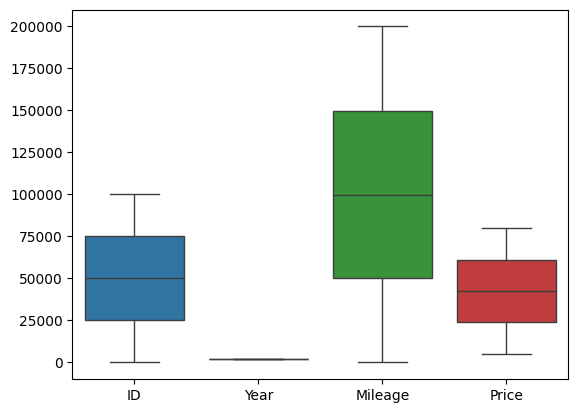

In [131]:
#Outiers
sns.boxplot(data=df)
plt.show()

### Insights: Absence of outliers

In [132]:
df.drop(["ID"],axis=1,inplace=True)

### ID column is dropped as it does not affect the price of a car

In [133]:
df.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [134]:
print("Categories in Brand Column: ")
print("Number of categories in Brand:",df["Brand"].nunique())
print(df["Brand"].value_counts())

Categories in Brand Column: 
Number of categories in Brand: 20
Brand
Ford             5133
Lexus            5125
Tesla            5088
Volvo            5087
Toyota           5065
Chevrolet        5064
Nissan           5054
Porsche          5026
Honda            5017
Mercedes-Benz    4986
Volkswagen       4983
Jeep             4971
Hyundai          4963
Audi             4955
Jaguar           4933
BMW              4921
Land Rover       4919
Kia              4911
Mazda            4900
Subaru           4899
Name: count, dtype: int64


In [135]:
print("Categories in Model Column: ")
print("Number of categories in Model:",df["Model"].nunique())
print(df["Model"].value_counts())

Categories in Model Column: 
Number of categories in Model: 21
Model
Generic Model 1    28356
Generic Model 2    28241
Generic Model 3    28188
F-150                893
RAV4                 884
Explorer             876
Mustang              866
Prius                862
CR-V                 860
Focus                857
Edge                 855
Civic                843
Accord               837
Camry                833
Corolla              832
Fit                  831
Tacoma               827
Highlander           827
Pilot                824
Odyssey              822
Escape               786
Name: count, dtype: int64


In [136]:
print("Categories in Brand_Model Column: ")
print("Number of categories in Brand_Model:",len((df["Brand"]+" "+df["Model"]).value_counts()))
print((df["Brand"]+" "+df["Model"]).value_counts())

Categories in Brand_Model Column: 
Number of categories in Brand_Model: 69
Tesla Generic Model 1        1746
Lexus Generic Model 1        1743
Chevrolet Generic Model 1    1728
Volvo Generic Model 1        1725
Volvo Generic Model 3        1717
                             ... 
Toyota Highlander             827
Toyota Tacoma                 827
Honda Pilot                   824
Honda Odyssey                 822
Ford Escape                   786
Name: count, Length: 69, dtype: int64


#### Combining brand and model so as to effectively represent the data

In [137]:
df['Brand_Model']=df['Brand']+" "+df['Model']
#df.drop(["Brand","Model"],axis=1,inplace=True)
df.head()

,Brand,Model,Year,Color,Mileage,Price,Condition,Brand_Model
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New,Mazda Generic Model 3
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New,Jaguar Generic Model 2
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New,Land Rover Generic Model 2
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used,Porsche Generic Model 2
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used,Land Rover Generic Model 3


In [138]:
df["Condition"].value_counts()

Condition
Used    50033
New     49967
Name: count, dtype: int64

### Creating a new field Used_Car and dropping the condition column

In [139]:
df["Used_Car"]=pd.get_dummies(df['Condition'],dtype=int,drop_first=True)
df.drop(['Condition'],axis=1,inplace=True)
df.head()

,Brand,Model,Year,Color,Mileage,Price,Brand_Model,Used_Car
0,Mazda,Generic Model 3,2003,Blue,22932,65732,Mazda Generic Model 3,0
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,Jaguar Generic Model 2,0
2,Land Rover,Generic Model 2,2022,Green,36616,50574,Land Rover Generic Model 2,0
3,Porsche,Generic Model 2,1997,Black,82812,35436,Porsche Generic Model 2,1
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Land Rover Generic Model 3,1


### Encoding Color

In [140]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("Color")["Price"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("Color")["Price"].median())

Grouping by mean of price:
 Color
Black     42483.207507
Blue      42412.423389
Green     42366.673067
Red       42732.956051
Silver    42645.649030
White     42569.723164
Name: Price, dtype: float64


Grouping by median of price:
 Color
Black     42516.0
Blue      42442.5
Green     42180.0
Red       42755.0
Silver    42721.0
White     42779.0
Name: Price, dtype: float64


In [141]:
#Frequency encoding
print("Grouping by count:\n",df["Color"].value_counts())

Grouping by count:
 Color
Blue      16786
Green     16771
Silver    16745
White     16703
Black     16544
Red       16451
Name: count, dtype: int64


### Since the mean price and count of each color categories are almost similar, they can't be used to effectively distinguish between the different categories

In [142]:
#Onehot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['Color']])

print(f"Onehot categories: {encoder.categories_}")
print(encoder.transform(df[['Color']]).toarray())

encoded_color=pd.DataFrame(encoder.transform(df[['Color']]).toarray(),columns=encoder.get_feature_names_out())
encoded_color.head()

Onehot categories: [array(['Black', 'Blue', 'Green', 'Red', 'Silver', 'White'], dtype=object)]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
df=pd.concat([df,encoded_color],axis=1)
df.drop(["Color"],axis=1,inplace=True)
df.head()

,Brand,Model,Year,Mileage,Price,Brand_Model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,Mazda,Generic Model 3,2003,22932,65732,Mazda Generic Model 3,0,0.0,1.0,0.0,0.0,0.0,0.0
1,Jaguar,Generic Model 2,2003,89937,58620,Jaguar Generic Model 2,0,0.0,0.0,0.0,0.0,1.0,0.0
2,Land Rover,Generic Model 2,2022,36616,50574,Land Rover Generic Model 2,0,0.0,0.0,1.0,0.0,0.0,0.0
3,Porsche,Generic Model 2,1997,82812,35436,Porsche Generic Model 2,1,1.0,0.0,0.0,0.0,0.0,0.0
4,Land Rover,Generic Model 3,2000,184616,63880,Land Rover Generic Model 3,1,1.0,0.0,0.0,0.0,0.0,0.0


### Encoding Brand_Model

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Brand         100000 non-null  object 
 1   Model         100000 non-null  object 
 2   Year          100000 non-null  int64  
 3   Mileage       100000 non-null  int64  
 4   Price         100000 non-null  int64  
 5   Brand_Model   100000 non-null  object 
 6   Used_Car      100000 non-null  int64  
 7   Color_Black   100000 non-null  float64
 8   Color_Blue    100000 non-null  float64
 9   Color_Green   100000 non-null  float64
 10  Color_Red     100000 non-null  float64
 11  Color_Silver  100000 non-null  float64
 12  Color_White   100000 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [145]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("Brand_Model")["Price"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("Brand_Model")["Price"].median())

Grouping by mean of price:
 Brand_Model
Audi Generic Model 1          43192.231476
Audi Generic Model 2          42179.823009
Audi Generic Model 3          43320.541487
BMW Generic Model 1           43300.202998
BMW Generic Model 2           42409.850595
                                  ...     
Volkswagen Generic Model 2    42224.088375
Volkswagen Generic Model 3    41523.989196
Volvo Generic Model 1         41826.495652
Volvo Generic Model 2         42422.010334
Volvo Generic Model 3         42569.238789
Name: Price, Length: 69, dtype: float64


Grouping by median of price:
 Brand_Model
Audi Generic Model 1          43872.0
Audi Generic Model 2          42382.0
Audi Generic Model 3          43682.0
BMW Generic Model 1           44823.0
BMW Generic Model 2           42065.0
                               ...   
Volkswagen Generic Model 2    41008.0
Volkswagen Generic Model 3    41156.0
Volvo Generic Model 1         41240.0
Volvo Generic Model 2         42158.0
Volvo Generic Model 3  

In [146]:
#Frequency encoding
print("Grouping by count:\n",df["Brand_Model"].value_counts())

Grouping by count:
 Brand_Model
Tesla Generic Model 1        1746
Lexus Generic Model 1        1743
Chevrolet Generic Model 1    1728
Volvo Generic Model 1        1725
Volvo Generic Model 3        1717
                             ... 
Toyota Highlander             827
Toyota Tacoma                 827
Honda Pilot                   824
Honda Odyssey                 822
Ford Escape                   786
Name: count, Length: 69, dtype: int64


In [147]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Brand_Model"] = label_encoder.fit_transform(df["Brand_Model"])
df.head()

,Brand,Model,Year,Mileage,Price,Brand_Model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,Mazda,Generic Model 3,2003,22932,65732,41,0,0.0,1.0,0.0,0.0,0.0,0.0
1,Jaguar,Generic Model 2,2003,89937,58620,25,0,0.0,0.0,0.0,0.0,1.0,0.0
2,Land Rover,Generic Model 2,2022,36616,50574,34,0,0.0,0.0,1.0,0.0,0.0,0.0
3,Porsche,Generic Model 2,1997,82812,35436,49,1,1.0,0.0,0.0,0.0,0.0,0.0
4,Land Rover,Generic Model 3,2000,184616,63880,35,1,1.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# brandModelCounts=df["Brand_Model"].value_counts().to_dict()
# df["Brand_Model"]=df["Brand_Model"].map(brandModelCounts)

### Encoding of Brand and Model

In [109]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("Brand")["Price"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("Brand")["Price"].median())

Grouping by mean of price:
 Brand
Audi             42888.039354
BMW              42815.353383
Chevrolet        42367.600711
Ford             42013.367426
Honda            41950.259119
Hyundai          42795.341930
Jaguar           42593.242449
Jeep             43036.869242
Kia              42381.788841
Land Rover       42836.997154
Lexus            42557.076488
Mazda            42743.810000
Mercedes-Benz    42508.820096
Nissan           42308.978433
Porsche          42731.034620
Subaru           42864.464176
Tesla            42376.758058
Toyota           42572.372754
Volkswagen       42129.006020
Volvo            42269.765087
Name: Price, dtype: float64


Grouping by median of price:
 Brand
Audi             43139.0
BMW              42784.0
Chevrolet        42772.5
Ford             41873.0
Honda            42156.0
Hyundai          42943.0
Jaguar           42312.0
Jeep             43334.0
Kia              42496.0
Land Rover       43201.0
Lexus            42247.0
Mazda            42795.5


In [110]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("Model")["Price"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("Model")["Price"].median())

Grouping by mean of price:
 Model
Accord             41336.017921
CR-V               41624.132558
Camry              44123.025210
Civic              42600.956109
Corolla            42389.441106
Edge               41828.156725
Escape             41196.947837
Explorer           42061.461187
F-150              42819.447928
Fit                42123.930205
Focus              41872.891482
Generic Model 1    42540.365778
Generic Model 2    42630.172161
Generic Model 3    42624.893572
Highlander         41682.413543
Mustang            42196.379908
Odyssey            42397.378345
Pilot              41627.684466
Prius              41341.024362
RAV4               43335.950226
Tacoma             42551.721886
Name: Price, dtype: float64


Grouping by median of price:
 Model
Accord             41135.0
CR-V               41472.0
Camry              44555.0
Civic              42424.0
Corolla            42070.0
Edge               40384.0
Escape             41882.0
Explorer           42084.5
F-150       

### Since the mean and median pricing of brand and model are almost the same, we can not go for target guided encoding

In [111]:
#Frequency encoding
print("Count of Brands:\n",df["Brand"].value_counts())
print("\n")
print("Count of Models:\n",df["Model"].value_counts())

Count of Brands:
 Brand
Ford             5133
Lexus            5125
Tesla            5088
Volvo            5087
Toyota           5065
Chevrolet        5064
Nissan           5054
Porsche          5026
Honda            5017
Mercedes-Benz    4986
Volkswagen       4983
Jeep             4971
Hyundai          4963
Audi             4955
Jaguar           4933
BMW              4921
Land Rover       4919
Kia              4911
Mazda            4900
Subaru           4899
Name: count, dtype: int64


Count of Models:
 Model
Generic Model 1    28356
Generic Model 2    28241
Generic Model 3    28188
F-150                893
RAV4                 884
Explorer             876
Mustang              866
Prius                862
CR-V                 860
Focus                857
Edge                 855
Civic                843
Accord               837
Camry                833
Corolla              832
Fit                  831
Tacoma               827
Highlander           827
Pilot                824
Odyssey  

In [148]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Brand"] = label_encoder.fit_transform(df["Brand"])
df["Model"] = label_encoder.fit_transform(df["Model"])
df.head()

,Brand,Model,Year,Mileage,Price,Brand_Model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,11,13,2003,22932,65732,41,0,0.0,1.0,0.0,0.0,0.0,0.0
1,6,12,2003,89937,58620,25,0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,12,2022,36616,50574,34,0,0.0,0.0,1.0,0.0,0.0,0.0
3,14,12,1997,82812,35436,49,1,1.0,0.0,0.0,0.0,0.0,0.0
4,9,13,2000,184616,63880,35,1,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# brandCounts=df["Brand"].value_counts().to_dict()
# modelCounts=df["Model"].value_counts().to_dict()
# df["Brand"]=df["Brand"].map(brandCounts)
# df["Model"]=df["Model"].map(modelCounts)

In [116]:
df.head()

,Brand,Model,Year,Mileage,Price,Brand_Model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,4900,28188,2003,22932,65732,1671,0,0.0,1.0,0.0,0.0,0.0,0.0
1,4933,28241,2003,89937,58620,1643,0,0.0,0.0,0.0,0.0,1.0,0.0
2,4919,28241,2022,36616,50574,1661,0,0.0,0.0,1.0,0.0,0.0,0.0
3,5026,28241,1997,82812,35436,1686,1,1.0,0.0,0.0,0.0,0.0,0.0
4,4919,28188,2000,184616,63880,1637,1,1.0,0.0,0.0,0.0,0.0,0.0


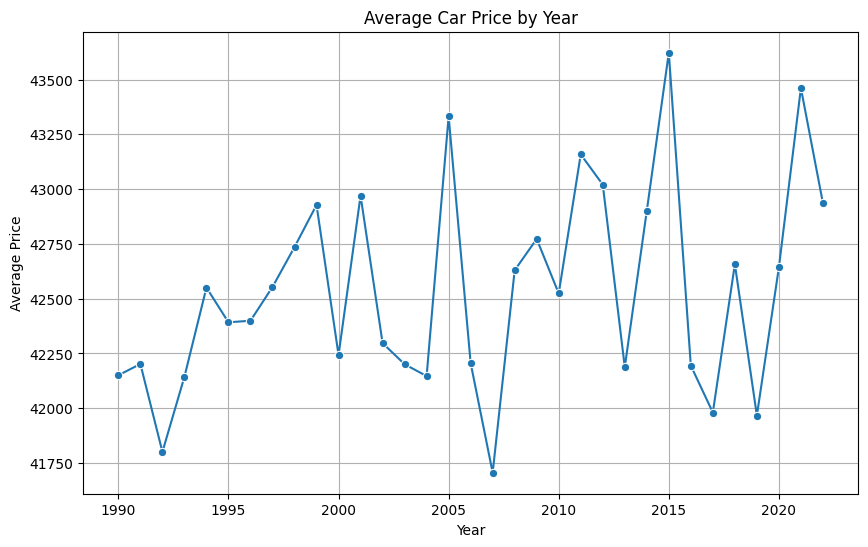

In [ ]:
avg_price_per_year = df.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=avg_price_per_year, marker='o')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [117]:
X,y=df.drop('Price',axis=1),df['Price']

### Feature Scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler

minmaxScaler = MinMaxScaler()
X_minmaxscaled = minmaxScaler.fit_transform(X)

pd.DataFrame(X_minmaxscaled,columns=X.columns).head()

,Brand,Model,Year,Mileage,Brand_Model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,0.004274,0.993906,0.40625,0.114652,0.921875,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.145299,0.995829,0.40625,0.449684,0.892708,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.085470,0.995829,1.00000,0.183074,0.911458,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.542735,0.995829,0.21875,0.414058,0.937500,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.085470,0.993906,0.31250,0.923088,0.886458,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [151]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100)
model.fit(X,y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [152]:
model.score(X,y)

0.8493439383349499

In [153]:
#with Label encoder - 100
feature_importances

,Feature,Importance
3,Mileage,0.446105
2,Year,0.178910
4,Brand_Model,0.097675
0,Brand,0.077248
1,Model,0.043337
5,Used_Car,0.036519
11,Color_White,0.021049
6,Color_Black,0.020178
8,Color_Green,0.020018
10,Color_Silver,0.019975


In [125]:
#with minmax scaling
feature_importances

,Feature,Importance
3,Mileage,0.441189
2,Year,0.178361
4,Brand_Model,0.099473
0,Brand,0.079066
1,Model,0.043542
5,Used_Car,0.036635
6,Color_Black,0.020987
11,Color_White,0.020713
8,Color_Green,0.020148
9,Color_Red,0.020106


In [120]:
#without any scaling
feature_importances

,Feature,Importance
3,Mileage,0.440105
2,Year,0.184319
4,Brand_Model,0.096735
0,Brand,0.076581
1,Model,0.043095
5,Used_Car,0.036911
9,Color_Red,0.020781
11,Color_White,0.020775
8,Color_Green,0.020761
6,Color_Black,0.020729


### Model Training

In [158]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_depth=3)

In [159]:
from sklearn.model_selection import train_test_split
X=df.drop('Price',axis=1)
y=df['Price']
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.2, random_state=42)

In [160]:
%%time
model.fit(X_train,y_train)

CPU times: user 6.44 s, sys: 24.1 ms, total: 6.46 s
Wall time: 7.75 s


RandomForestRegressor(max_depth=3)

In [161]:
model.score(X_val,y_val)

3.4696531024502875e-05

In [ ]:
model1=RandomForestRegressor(n_estimators=100,criterion='poisson',max_depth=3)
model1.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=3)

In [ ]:
model1.score(X_train,y_train)

0.0016484291484205604